# Sentiment Analysis of Oil & Gas Supermajors

## 1.- Definition: 
#### In essence, it is the process of determining the emotional tone behind a series of words, used to gain an understanding of the the attitudes, opinions and emotions expressed within an online mention. (Kristian Bannister - Senior Marketing Manager)

## 2.- Objective: 
#### - to gain an overview of the wider public opinion behind the oil & gas market and how is seen not only by the supermajors but also the specialists, investors and  journalists dedicated to the energy market

## 3.- Relevance:

#### 1 - Shifts in sentiment on social media have been shown to correlate with shifts in the stock market.
#### 2 - We take all the words and phrases that imply positive or negative sentiment and apply rules that consider how context might affect the tone of the content. 
#### 3 - Carefully crafted rules help the software know when a sentence is positive or negative; neutral sentences will be considered when substracting all positive and negative sentiments from the entire dataset.

## 4.- References:
1 - Twitter Analysis with Python -- https://datascienceplus.com/twitter-analysis-with-python/

2 - Mining Twitter Data with Python -- https://marcobonzanini.com/2015/05/17/mining-twitter-data-with-python-part-6-sentiment-analysis-basics/

3 - Basic data analysis on Twitter with Python -- https://medium.freecodecamp.org/basic-data-analysis-on-twitter-with-python-251c2a85062e

4 - Twitter Sentiment Analysis using Python -- https://www.geeksforgeeks.org/twitter-sentiment-analysis-using-python/

5 - Sentiment detection with Keras, word embeddings and LSTM deep learning networks -- https://www.liip.ch/en/blog/sentiment-detection-with-keras-word-embeddings-and-lstm-deep-learning-networks

6 - models.word2vec – Word2vec embeddings -- https://radimrehurek.com/gensim/models/word2vec.html

7 - Sense2Vec with SpaCy and Gensim -- https://explosion.ai/blog/sense2vec-with-spacy

8 - Learn Word2Vec by implementing it in tensorflow -- https://towardsdatascience.com/learn-word2vec-by-implementing-it-in-tensorflow-45641adaf2ac

9 - Pre-trained word embeddings -- https://github.com/keras-team/keras/blob/master/examples/pretrained_word_embeddings.py

10 - Application Management with Twitter API -- https://apps.twitter.com/

11 - Support on Python Syntax and Examples -- https://stackoverflow.com/

12 - Word2Vec Tutorial - The Skip-Gram Model -- http://mccormickml.com/2016/04/19/word2vec-tutorial-the-skip-gram-model/

13 - Representing Words -- http://veredshwartz.blogspot.com/2016/01/representing-words.html

14 - How to Use Word Embeddings Layers for Deep Learning with Keras -- https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/

15 - Using pre-trained word embeddings in a Keras model -- https://blog.keras.io/using-pre-trained-word-embeddings-in-a-keras-model.html

16 - Word2Vec with Tensorflow -- https://github.com/minsuk-heo/python_tutorial/blob/master/data_science/nlp/word2vec_tensorflow.ipynb

17 - Understanding Sentiment Analysis: What It Is & Why It’s Used -- https://www.brandwatch.com/blog/understanding-sentiment-analysis/


## 5.- Installing and Importing key Libraries

In [1]:
# importing key libraries
import sys
# !{sys.executable} -m pip install tweepy
# !{sys.executable} -m pip install textblob
# !{sys.executable} -m pip install wordcloud
# !{sys.executable} -m pip install nltk
# !{sys.executable} -m pip install twython

In [2]:
# Import the necessary libraies and methods
import json
import numpy as np
import pandas as pd
import re
import warnings

# import Variables that contains the user credentials to access Twitter API
from twitter_authentication import API_KEY, API_SECRET, ACCESS_TOKEN, ACCESS_TOKEN_SECRET

# tweepy is the python client for the official Twitter API
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream
from tweepy import API

# textblob is the python library for sentiment analysis
from textblob import TextBlob

# Visualisation
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

# wordcloud is a python library for printing a cloud of words
from wordcloud import WordCloud, STOPWORDS

# nltk
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
from nltk import tokenize

# set the matplotlib style
matplotlib.style.use('ggplot')

%matplotlib inline

## 6.- Suggested List of Tweets Tags -- Including supermajors and energy analysts

In [3]:
#This line filter Twitter Streams to capture data by the keywords included in TAGS variable
TAGS = ['@PetroleumEcon', '@IHSMarkit', '@PWYPUSA', '@SPGlobalRatings', '@energyintel', '@michaelkamon', 
        '@pvmagazineusa', '@mwtnews', '@NRGInstitute', '@WorldOil', '@robinenergy', '@PortXLglobal', 
        '@UpstreamOnline', '@greentechmedia', '@PlattsOil', '@AyataAnalytics', '@OilandGasIQ', '@oil_recruitment', 
        '@Gaurav81184', '@ReemaHarfoushi', '@EIAgov', '@tfoxlaw', '@tapmanagement', '@boonepickens', '@EmilyPickrell', 
        '@Chevron', '@IERenergy', '@TheOilDrum', '@FPSONetwork', '@OilsandsEditor', '@Shell_NatGas', '@iraqoilreport', 
        '@jpolson9', '@BloombergNRG', '@oilandgasnews', '@OilGasMalaysia', '@UKERCHQ', '@OilGasCanada', '@ooga_hq', 
        '@OilandGasInvest', '@robinenergy', '@derek_brower', '@theoilprice', '@stevelevine', '@marcellusmin', 
        '@AmyAHarder', '@saeverley', '@davidshellblog', '@KateGalbraith', '@oilandgasuk', '@TerryMac999', '@BP_America', 
        '@RigData', '@LaOilGasAssoc', '@Shell', '@BGGroup', '@nelderini', '@PatrickOsgood', '@JonathanFahey', 
        '@wenkennedy', '@psdvi', '@EnergyInDepth', '@exxonmobil', '@twitoil', '@Saudi_Aramco', '@Total', 
        '@offshoremgzn', '@Chevron', '@OGJOnline', '@OilVoice', '@BP_plc', '@Rigzone', '@UpstreamOnline', '@OilandGasIQ', 
        '@WorldOil', '@worldoilngas', '@ExxonMobil', '@ExxonMobil_UK', '@ExxonMobil_EU', '@ExxonMobil_NG', '@ExxonMobil_ID', 
        '@exxonmobil_qa', '@exxonmobil_aus', '@ExxonMobil_AK', '@Shell', '@Shell_UKLtd', '@Shell_US', '@Shell_Canada', 
        '@Shell_Nigeria', '@Shell_India', '@eni', '@BP_UK']

# sort a list
def sortList(list):
    return list.sort(key=str.lower)

# set to lower case elements in a list
def lcase(list):
    l = [a.lower() for a in list]
    return l

# remove duplicates in a list
def remove_dup_inlist(onelist):
    return list(set(onelist))

TAGS = lcase(TAGS)
TAGS = remove_dup_inlist(TAGS)
sortList(TAGS)

print((len(TAGS), TAGS))

(85, ['@amyaharder', '@ayataanalytics', '@bggroup', '@bloombergnrg', '@boonepickens', '@bp_america', '@bp_plc', '@bp_uk', '@chevron', '@davidshellblog', '@derek_brower', '@eiagov', '@emilypickrell', '@energyindepth', '@energyintel', '@eni', '@exxonmobil', '@exxonmobil_ak', '@exxonmobil_aus', '@exxonmobil_eu', '@exxonmobil_id', '@exxonmobil_ng', '@exxonmobil_qa', '@exxonmobil_uk', '@fpsonetwork', '@gaurav81184', '@greentechmedia', '@ierenergy', '@ihsmarkit', '@iraqoilreport', '@jonathanfahey', '@jpolson9', '@kategalbraith', '@laoilgasassoc', '@marcellusmin', '@michaelkamon', '@mwtnews', '@nelderini', '@nrginstitute', '@offshoremgzn', '@ogjonline', '@oil_recruitment', '@oilandgasinvest', '@oilandgasiq', '@oilandgasnews', '@oilandgasuk', '@oilgascanada', '@oilgasmalaysia', '@oilsandseditor', '@oilvoice', '@ooga_hq', '@patrickosgood', '@petroleumecon', '@plattsoil', '@portxlglobal', '@psdvi', '@pvmagazineusa', '@pwypusa', '@reemaharfoushi', '@rigdata', '@rigzone', '@robinenergy', '@saeverl

## 7.- Twitter API Authentication

In [4]:
# this handles Twitter authentication -- see reference 10 for details
auth = OAuthHandler(API_KEY, API_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)

api = API(auth, wait_on_rate_limit=True)   # it will wait instead of failing, when rate limit is reached

In [5]:
MAX_TWEETS = 100
LANG = 'en'

## 8.- Useful functions to modularize the code

In [6]:
# clean tweet from unnecessary characters -- needs further polish
def clean_tweet(tweet):
    # clean text from a tweet
    return " ".join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet.text).split())

# quality tweet sentiment based on textblob library
# Other libraries are also useful for this like NLTK, and LSTM with Tensorflow (more complicated)
def get_tweet_sentiment(tweet):
    # get sentiment from a cleansed tweet
    analysis = TextBlob(clean_tweet(tweet))
    # set sentiment
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'negative'

# get tweets based on a particular tag and store them in a list
def get_tweets(query, max_tweets = 10, lang='en'):
    try:
        # call twitter api to fetch tweets
        fetched_tweets = api.search(q = query, count = max_tweets, lang=lang)
        # parsing tweets one by one
        for tweet in fetched_tweets:
            # empty dictionary to store required params of a tweet
            parsed_tweet = {}

            # saving text of tweet
            parsed_tweet['text'] = tweet.text
            
            # saving sentiment of tweet
            parsed_tweet['sentiment'] = get_tweet_sentiment(tweet)

            # appending parsed tweet to tweets list
            if tweet.retweet_count > 0:
                # if tweet has retweets, ensure that it is appended only once
                if parsed_tweet not in tweets:
                    tweets.append(parsed_tweet)
            else:
                tweets.append(parsed_tweet)
        # return parsed tweets
        return tweets
    except tweepy.TweepError as e:
        # print error (if any)
        print("Error : " + str(e))

## 9.- Run all over the tags and evaluate the sentiment of different twitters

In [7]:
# initialize list of tweets
tweets = []
# get all tweets from the list of TAGS
for i, tag in enumerate(TAGS):
    tweets = get_tweets(query = tag, max_tweets = MAX_TWEETS)

## 10.- Report of sentiment analysis

In [8]:
# picking positive tweets from tweets
ptweets = [tweet for tweet in tweets if tweet['sentiment'] == 'positive']
# percentage of positive tweets
print("Positive tweets percentage: {}".format(100*len(ptweets)/len(tweets)))
# picking negative tweets from tweets
ntweets = [tweet for tweet in tweets if tweet['sentiment'] == 'negative']
# percentage of negative tweets
print("Negative tweets percentage: {}".format(100*len(ntweets)/len(tweets)))
# percentage of neutral tweets
print("Neutral tweets percentage: {}".format(100*(len(tweets) - len(ntweets) - len(ptweets))/len(tweets)))

# printing first 5 positive tweets
print("\n\n======================================================")
print("total positive tweets={}".format(len(ptweets)))
print("(first 5) Positive tweets:")
for tweet in ptweets[:5]:
    print(tweet['text'])

# printing first 5 negative tweets
print("\n\n======================================================")
print("total negative tweets={}".format(len(ntweets)))
print("(first 5) Negative tweets:")
for tweet in ntweets[:5]:
    print(tweet['text'])


Positive tweets percentage: 39.70420932878271
Negative tweets percentage: 12.627986348122867
Neutral tweets percentage: 47.66780432309442


total positive tweets=1047
(first 5) Positive tweets:
RT @AmyAHarder: In early January I laid out eight energy and climate issues to watch this year. Here’s my rejiggered crystal ball — and a f…
RT @RLewis_UIowa: Interesting predictions -- &amp; progress report -- from @AmyAHarder via @axios https://t.co/VwLmI2wxCE
Interesting predictions -- &amp; progress report -- from @AmyAHarder via @axios https://t.co/VwLmI2wxCE
RT @AmyAHarder: My latest Harder Line column: Six months in, fact-checking my energy crystal ball for 2018. https://t.co/RjdHgfAsBi via @ax…
@AmyAHarder sees momentum for US carbon tax. “Some energy firms have launched a new political lobbying campaign bac… https://t.co/KrL4zYUR7P


total negative tweets=333
(first 5) Negative tweets:
RT @edking_I: Wow: Roughly half of the methane the oil industry is emitting now "could be cut at no co

In [9]:
pd.set_option("display.max_columns", 600)
pd.set_option('display.max_colwidth', -1)

In [10]:
tweets_df = pd.DataFrame(tweets)
tweets_df[['sentiment', 'text']][:6]

,sentiment,text
0,positive,RT @AmyAHarder: In early January I laid out eight energy and climate issues to watch this year. Here’s my rejiggered crystal ball — and a f…
1,neutral,@AmyAHarder Israel's red lines may not matter for the Saudi nuclear deal if South Korea gets the business which it… https://t.co/0UOXStGJj9
2,neutral,"RT @AmyAHarder: One conservative on EPA's efforts to repeal Obama-era methane rules: “I’ve given up on even paying attention to that."" That…"
3,positive,RT @RLewis_UIowa: Interesting predictions -- &amp; progress report -- from @AmyAHarder via @axios https://t.co/VwLmI2wxCE
4,neutral,"RT @AmyAHarder: Six months into the year, here's how I'm doing on these 2018 predictions. https://t.co/RjdHgfS3sQ\n\n1. Regulatory rollbacks…"
5,positive,Interesting predictions -- &amp; progress report -- from @AmyAHarder via @axios https://t.co/VwLmI2wxCE


## 11.- Visualization of Results

In [11]:
# visualization with wordcloud
def wordcloud(tweets, col):
    stopwords = set(STOPWORDS)
    wordcloud = WordCloud(background_color="white",stopwords=stopwords,random_state = 123).generate(" ".join([t for t in tweets[col]]))
    plt.figure(figsize=(20,10), facecolor='k')
    plt.axis("off")
    plt.title("Common Words on Tweets of SuperMajors")
    plt.imshow(wordcloud)

### 11.1- Visualizing most common words in a cloud 

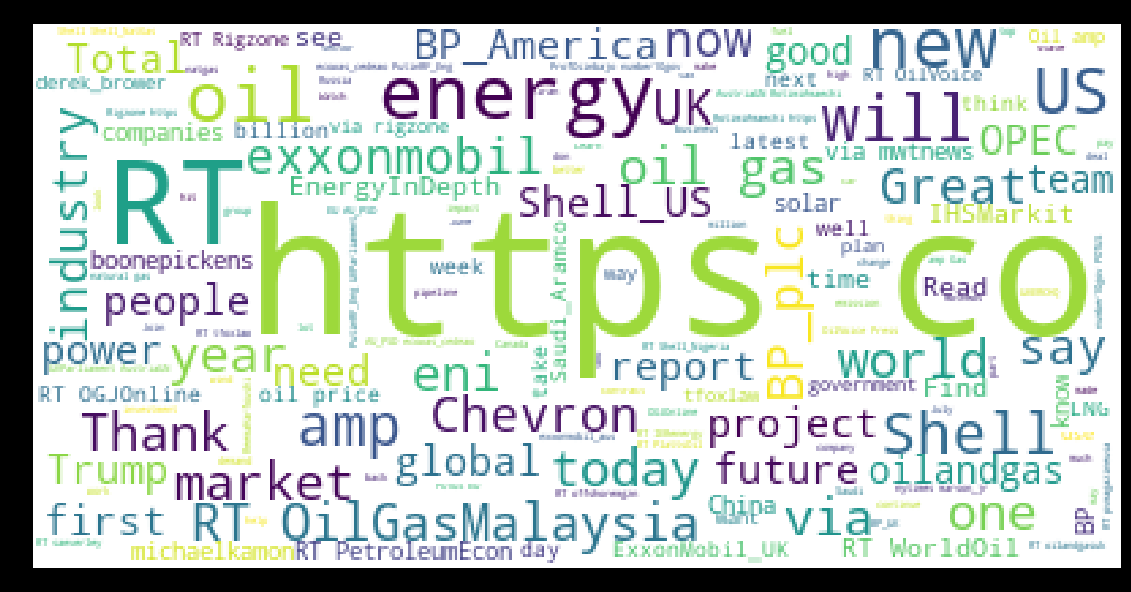

In [12]:
wordcloud(tweets_df, 'text')

### 11.2- Visualizing most common sentiment present in the tweets

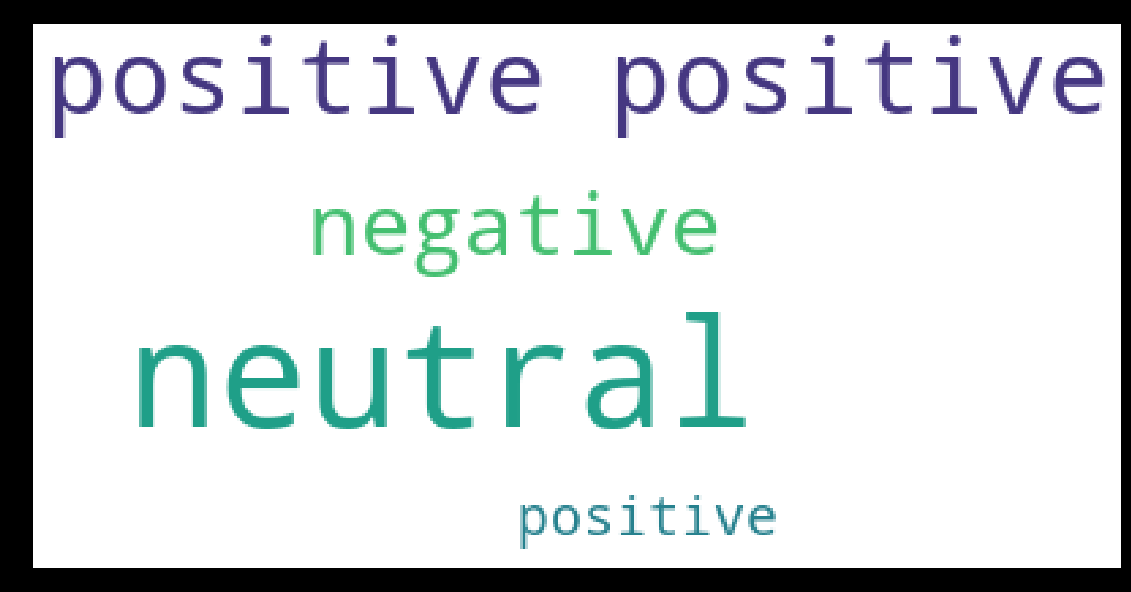

In [13]:
wordcloud(tweets_df, 'sentiment')